In [13]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

# [실습1] Sequence 숫자 데이터 예측하기

### 데이터 준비

In [4]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 
n, seq_len = 8, 16
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [5]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### simple RNN 모델 구현

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
model = Sequential([
    SimpleRNN(units=256, return_sequences=False, input_shape=(16, 1)),
    Dense(1)
])
model.compile(loss='mse', metrics='mae', optimizer='adam')

2023-02-27 15:28:39.616403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-27 15:28:39.617818: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



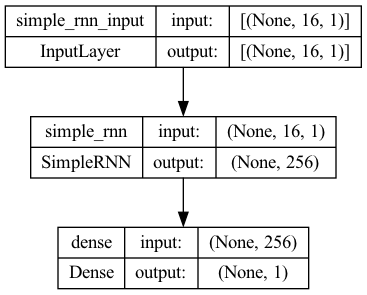

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
# 학습
hist = model.fit(train_seq_X, train_Y, epochs=100, verbose=2)

Epoch 1/100


2023-02-27 15:29:42.210026: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-27 15:29:42.580878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 3.3833 - mae: 1.8235 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.0431 - mae: 0.1738 - 103ms/epoch - 103ms/step
Epoch 3/100
1/1 - 0s - loss: 0.9176 - mae: 0.9532 - 91ms/epoch - 91ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3319 - mae: 0.5683 - 120ms/epoch - 120ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0698 - mae: 0.2382 - 85ms/epoch - 85ms/step
Epoch 6/100
1/1 - 0s - loss: 0.4375 - mae: 0.6503 - 86ms/epoch - 86ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2654 - mae: 0.5045 - 84ms/epoch - 84ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0343 - mae: 0.1644 - 85ms/epoch - 85ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0324 - mae: 0.1642 - 85ms/epoch - 85ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1353 - mae: 0.3614 - 86ms/epoch - 86ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1530 - mae: 0.3853 - 95ms/epoch - 95ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0782 - mae: 0.2707 - 95ms/epoch - 95ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0126 - mae: 0.0982 - 90ms/epoch - 90ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0

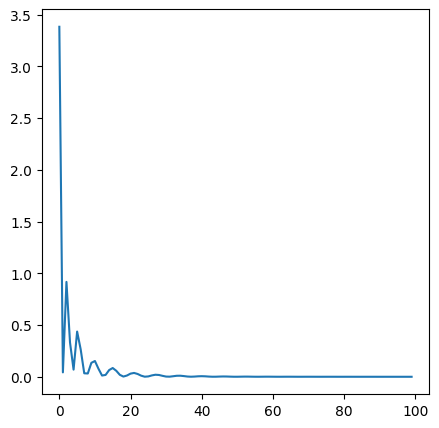

In [14]:
df = pd.DataFrame(hist.history)

plt.figure(figsize=(5, 5))
plt.plot(df.loss, label='train_loss');

# [실습2] sin함수 형태의 시계열 데이터 예측하기
- sin 곡선의 일부를 잘라 만든 시퀀스를 보고 다음 값을 예측하는 RNN 모델을 구현한다.


### 데이터 준비

In [ ]:
# 데이터는 각 차원이 자료수, 타임 스텝의 크기, 특성 형태의 3차원 텐서

In [ ]:
# 사인 함수 그리기
import numpy as np 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx)

import numpy as np 
from matplotlib import pyplot as plt 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx) 

plt.plot(x, np.sin(x))


In [15]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))
s = np.sin(2 * np.pi )
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [17]:
# 생성하는 시퀀스는 구간의 길이는 같고, 시작하는 값은 모두 다르게 만듦.(난수발생)
# 구간의 마지막 값으로 Y label을 만듦
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

seq_X.shape, Y.shape

((100, 10, 1), (100,))

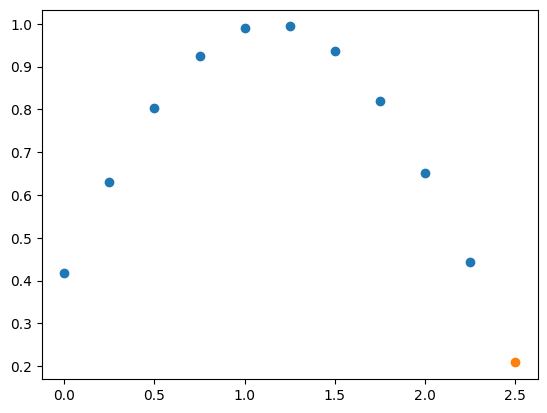

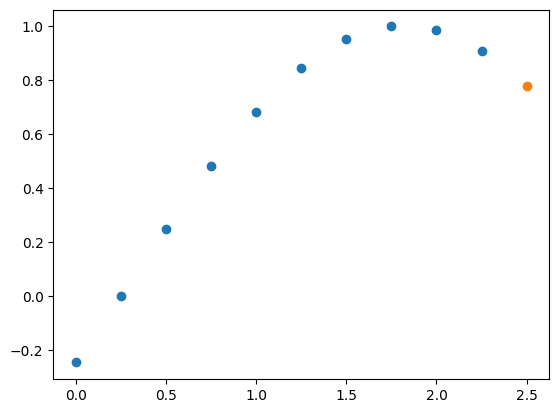

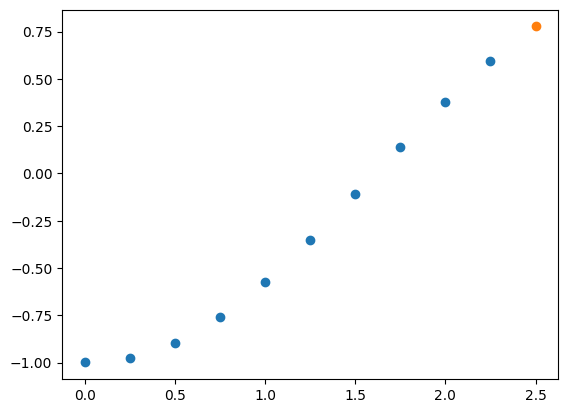

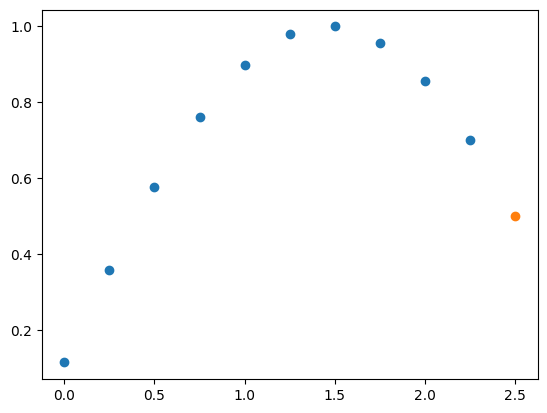

In [18]:
# 100개의 시퀀스 중 4개를 시각화해봄
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [19]:
# 80개는 훈련, 20개는 검증
X_train = seq_X[:80]
y_train = Y[:80]
X_test = seq_X[80:]
y_test = Y[80:]

### simple RNN 모델 구현

In [21]:
model = Sequential([
    SimpleRNN(units=10, return_sequences=False,
              input_shape=(10, 1)),
    Dense(1)
])

model.compile(loss='mse', metrics='mae', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50


2023-02-27 15:38:46.646329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 - 1s - loss: 0.2224 - mae: 0.4394 - 1s/epoch - 374ms/step
Epoch 2/50
3/3 - 0s - loss: 0.1670 - mae: 0.3817 - 131ms/epoch - 44ms/step
Epoch 3/50
3/3 - 0s - loss: 0.1226 - mae: 0.3269 - 124ms/epoch - 41ms/step
Epoch 4/50
3/3 - 0s - loss: 0.0867 - mae: 0.2748 - 130ms/epoch - 43ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0576 - mae: 0.2235 - 126ms/epoch - 42ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0366 - mae: 0.1764 - 122ms/epoch - 41ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0221 - mae: 0.1343 - 123ms/epoch - 41ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0135 - mae: 0.0962 - 125ms/epoch - 42ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0095 - mae: 0.0767 - 131ms/epoch - 44ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0077 - mae: 0.0732 - 127ms/epoch - 42ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0077 - mae: 0.0745 - 170ms/epoch - 57ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0081 - mae: 0.0755 - 122ms/epoch - 41ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0081 - mae: 0.0739 - 123ms/epoch - 41ms/step
Epoch 14/50
3/3 - 0s - loss: 0.007

In [23]:
df = pd.DataFrame(hist.history)
df

,loss,mae
0,0.222374,0.439352
1,0.167050,0.381665
2,0.122561,0.326857
3,0.086746,0.274837
4,0.057589,0.223510
5,0.036644,0.176435
6,0.022116,0.134337
7,0.013454,0.096234
8,0.009544,0.076671
9,0.007700,0.073242


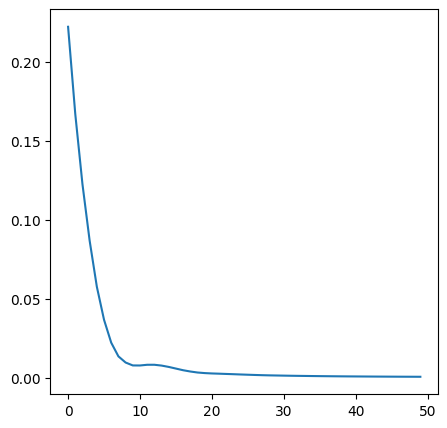

In [24]:
# 시각화 그리기
plt.figure(figsize=(5, 5))
plt.plot(df.loss, label='train_loss');